In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.io
def morsetrans(x,K,ga,be,method='bandwidth' ):
    filename='../morse_g{:.2f}_b{:.2f}_{}.mat'.format(ga,be,method)
    W=scipy.io.loadmat(filename)['W']
    assert(K<5)
    W=W[:,:,K]
    print filename,W.shape,W.dtype,np.sum(W)
    X=np.fft.fft(x)
    print X.shape,X.dtype ,X.sum()
    print np.sum(X.reshape([-1,1])*W)
    return np.fft.ifft( X.reshape([-1,1])*W,axis=0).T;

In [3]:
#morsewave(16000, 3, 2,fs,method='bandpass')

In [4]:
import soundfile  
filename='/home/bo/mydev/tsrc2017/input/train/audio/happy/0132a06d_nohash_0.wav'
x,_=soundfile.read(filename)
x.shape

(16000,)

In [5]:
len(x),sum(x)

(16000, 0.74755859375)

<IPython.core.display.Javascript object>


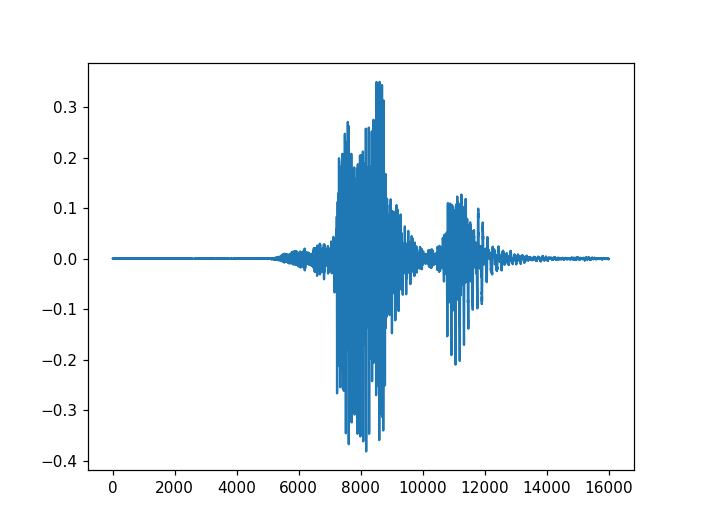

In [6]:
plt.figure(),plot(x);plt.show()

../morse_g3.00_b1.00_bandwidth.mat (16000, 51) float64 76320.7147149
(16000,) complex128 (1.02917674383e-13-1.92734717075e-13j)
(-37.8338094563-134.859405404j)
(51, 16000)


<IPython.core.display.Javascript object>


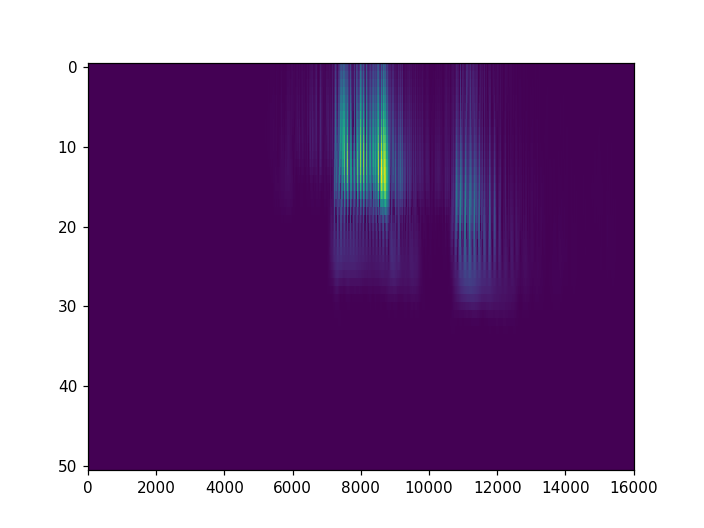

../morse_g3.00_b1.00_bandwidth.mat (16000, 51) float64 -24128.7781221
(16000,) complex128 (1.02917674383e-13-1.92734717075e-13j)
(-30.4094993364-38.191237713j)
(51, 16000)


<IPython.core.display.Javascript object>

../morse_g3.00_b1.00_bandwidth.mat (16000, 51) float64 37895.4141691
(16000,) complex128 (1.02917674383e-13-1.92734717075e-13j)
(-28.1575786814-67.1421141671j)
(51, 16000)


<IPython.core.display.Javascript object>

(51, 16000)


In [7]:
lst=[]
lst2=[]

for K in range(3):
    a=morsetrans(x,K, 3,1)
    lst.append(a)
    b=np.log1p(np.abs(a))
    print b.shape
    plt.figure();imshow(b,aspect='auto');plt.show()
    lst2.append(b)
a=np.sum(lst,0)
b=np.log1p(np.abs(a))
print b.shape
imshow(b,aspect='auto');plt.show()


In [9]:
b.shape,a.shape

((51, 16000), (51, 16000))

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [12]:
Z.shape

(40, 40)

<IPython.core.display.Javascript object>


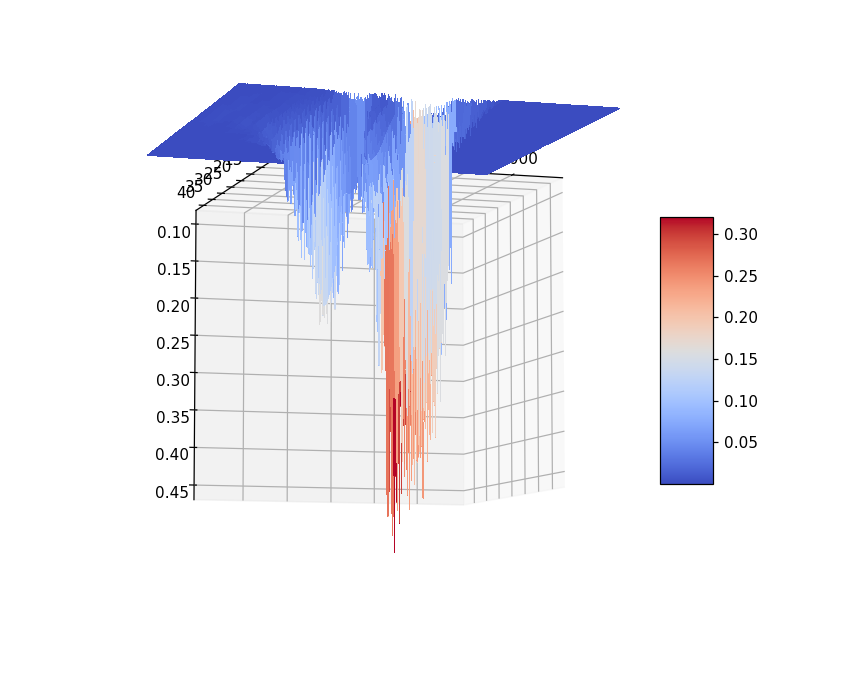

(51, 16000) (51, 16000) (51, 16000)


In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0,b.shape[1])
Y = np.arange(0,b.shape[0])
X, Y = np.meshgrid(X, Y)
Z = b
print X.shape,Y.shape,Z.shape
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()